In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats import kstest

In [8]:
data = pd.read_excel('/content/итоговый проект 1 датасет.xlsx', sheet_name='Sample Sales')
data.head()

,Row ID,Purchase ID,Operation Date,Ship Date,Ship Mode,Customer ID,Customer Segment,City,City (Russian),Federal subject,Federal district,Category,Sub-Category,Product ID,Sales,Quantity,Profit
0,1,2013-3950,2020-11-09,2020-11-12,Special,7560,Individual,Yaroslavl,Ярославль,Yaroslavl Oblast,Central,Monitors,"19,1"" - 23""",MON-1923-20008346,11133.300,1,1781.3280
1,2,2013-3950,2020-11-09,2020-11-12,Special,7560,Individual,Yaroslavl,Ярославль,Yaroslavl Oblast,Central,Monitors,"23,1""-25""",MON-2325-20002762,20738.300,1,6221.4900
2,3,2013-620,2020-06-13,2020-06-17,Special,9135,Corporate,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Other devices,Webcams,OTH-WCA-20001282,559.215,1,229.8995
3,4,2012-6290,2019-10-11,2019-10-18,Standard,31005,Individual,Krasnogorsk,Красногорск,Moscow Oblast,Central,Monitors,"28,1""+",MON-281-20008870,35517.420,2,-10063.2690
4,5,2012-6290,2019-10-11,2019-10-18,Standard,31005,Individual,Krasnogorsk,Красногорск,Moscow Oblast,Central,Other devices,Other equipment,OTH-OTH-20000584,475.320,1,-368.3730


In [ ]:
corr = data.corr()
corr

<ipython-input-3-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Row ID,Customer ID,Sales,Quantity,Profit
Row ID,1.000000,-0.006929,0.002032,-0.004028,0.013551
Customer ID,-0.006929,1.000000,0.011211,0.016711,0.003051
Sales,0.002032,0.011211,1.000000,0.168897,0.609027
Quantity,-0.004028,0.016711,0.168897,1.000000,0.086541
Profit,0.013551,0.003051,0.609027,0.086541,1.000000


In [ ]:
corr_table = abs(corr['Profit']) >= 0.25
corr_table = corr_table.to_frame().reset_index()
corr_table

,index,Profit
0,Row ID,False
1,Customer ID,False
2,Sales,True
3,Quantity,False
4,Profit,True


In [ ]:
count_purchases_by_customer = data.groupby(['Customer ID'])['Purchase ID'].count().reset_index().sort_values('Purchase ID', ascending=False)
count_purchases_by_customer

,Customer ID,Purchase ID
787,35550,36
387,17505,34
595,26865,33
689,31095,32
391,17685,32
...,...,...
737,33255,1
123,5625,1
455,20565,1
378,17100,1


In [ ]:
count_customer_segment_by_customer = data.groupby(['Customer Segment'])['Purchase ID'].count().reset_index().sort_values('Purchase ID', ascending=False)
count_customer_segment_by_customer

,Customer Segment,Purchase ID
2,Individual,4912
0,Corporate,2823
1,Entrepreneur,1686


In [ ]:
sales_customer_segment_by_customer = data.groupby(['Customer Segment'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
sales_customer_segment_by_customer

,Customer Segment,Profit
2,Individual,6.385862e+06
0,Corporate,3.877343e+06
1,Entrepreneur,2.863977e+06


In [ ]:
ship_days = data['Ship Date'] - data['Operation Date']
ship_days = ship_days.dt.days.to_frame()
ship_days

,0
0,3
1,3
2,4
3,7
4,7
...,...
9416,4
9417,4
9418,4
9419,2


In [ ]:
data['Ship Days'] = (data['Ship Date'] - data['Operation Date']).dt.days

In [ ]:
data.head()

,Row ID,Purchase ID,Operation Date,Ship Date,Ship Mode,Customer ID,Customer Segment,City,City (Russian),Federal subject,Federal district,Category,Sub-Category,Product ID,Sales,Quantity,Profit,Ship Days
0,1,2013-3950,2020-11-09,2020-11-12,Special,7560,Individual,Yaroslavl,Ярославль,Yaroslavl Oblast,Central,Monitors,"19,1"" - 23""",MON-1923-20008346,11133.300,1,1781.3280,3
1,2,2013-3950,2020-11-09,2020-11-12,Special,7560,Individual,Yaroslavl,Ярославль,Yaroslavl Oblast,Central,Monitors,"23,1""-25""",MON-2325-20002762,20738.300,1,6221.4900,3
2,3,2013-620,2020-06-13,2020-06-17,Special,9135,Corporate,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Other devices,Webcams,OTH-WCA-20001282,559.215,1,229.8995,4
3,4,2012-6290,2019-10-11,2019-10-18,Standard,31005,Individual,Krasnogorsk,Красногорск,Moscow Oblast,Central,Monitors,"28,1""+",MON-281-20008870,35517.420,2,-10063.2690,7
4,5,2012-6290,2019-10-11,2019-10-18,Standard,31005,Individual,Krasnogorsk,Красногорск,Moscow Oblast,Central,Other devices,Other equipment,OTH-OTH-20000584,475.320,1,-368.3730,7


In [ ]:
data['Operation Date'] = pd.to_datetime(data['Operation Date'])

In [ ]:
data["OP year"] = data["Operation Date"].dt.to_period("Y")
data.head()

,Row ID,Purchase ID,Operation Date,Ship Date,Ship Mode,Customer ID,Customer Segment,City,City (Russian),Federal subject,Federal district,Category,Sub-Category,Product ID,Sales,Quantity,Profit,Ship Days,OP year
0,1,2013-3950,2020-11-09,2020-11-12,Special,7560,Individual,Yaroslavl,Ярославль,Yaroslavl Oblast,Central,Monitors,"19,1"" - 23""",MON-1923-20008346,11133.300,1,1781.3280,3,2020
1,2,2013-3950,2020-11-09,2020-11-12,Special,7560,Individual,Yaroslavl,Ярославль,Yaroslavl Oblast,Central,Monitors,"23,1""-25""",MON-2325-20002762,20738.300,1,6221.4900,3,2020
2,3,2013-620,2020-06-13,2020-06-17,Special,9135,Corporate,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Other devices,Webcams,OTH-WCA-20001282,559.215,1,229.8995,4,2020
3,4,2012-6290,2019-10-11,2019-10-18,Standard,31005,Individual,Krasnogorsk,Красногорск,Moscow Oblast,Central,Monitors,"28,1""+",MON-281-20008870,35517.420,2,-10063.2690,7,2019
4,5,2012-6290,2019-10-11,2019-10-18,Standard,31005,Individual,Krasnogorsk,Красногорск,Moscow Oblast,Central,Other devices,Other equipment,OTH-OTH-20000584,475.320,1,-368.3730,7,2019


In [ ]:
avg_ship_days_per_year = data.groupby(['OP year'])['Ship Days'].mean().reset_index()
avg_ship_days_per_year = avg_ship_days_per_year.round(3)
avg_ship_days_per_year

,OP year,Ship Days
0,2018,4.014
1,2019,4.010
2,2020,3.947
3,2021,3.912


In [ ]:
data_2018 = data[data['OP year'] == '2018']
data_2018.head()

,Row ID,Purchase ID,Operation Date,Ship Date,Ship Mode,Customer ID,Customer Segment,City,City (Russian),Federal subject,Federal district,Category,Sub-Category,Product ID,Sales,Quantity,Profit,Ship Days,OP year
5,6,2011-5930,2018-06-09,2018-06-14,Standard,5130,Individual,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Monitors,"25,1""-27""",MON-2527-20007346,1601.910,3,338.1810,5,2018
6,7,2011-5930,2018-06-09,2018-06-14,Standard,5130,Individual,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Other devices,Mice,OTH-MOU-20009890,278.460,2,52.5980,5,2018
7,8,2011-5930,2018-06-09,2018-06-14,Standard,5130,Individual,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Computers,Mobile phones,COM-PHO-20002928,43373.205,3,8674.6410,5,2018
8,9,2011-5930,2018-06-09,2018-06-14,Standard,5130,Individual,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Other devices,Joysticks & gamepads,OTH-JOY-20000522,589.815,1,229.3725,5,2018
9,10,2011-5930,2018-06-09,2018-06-14,Standard,5130,Individual,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city),Northwest,Other devices,Keyboards,OTH-KEY-20000278,3515.940,2,781.3200,5,2018


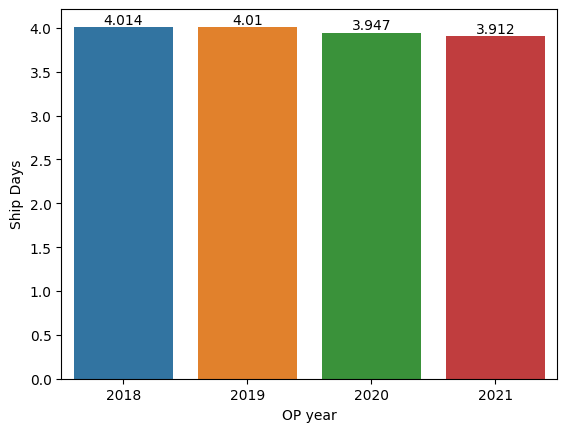

In [ ]:
avg_ship_days_per_year_chart = sns.barplot(avg_ship_days_per_year, x="OP year", y="Ship Days", estimator="sum")
avg_ship_days_per_year_chart.bar_label(avg_ship_days_per_year_chart.containers[0], fontsize=10);

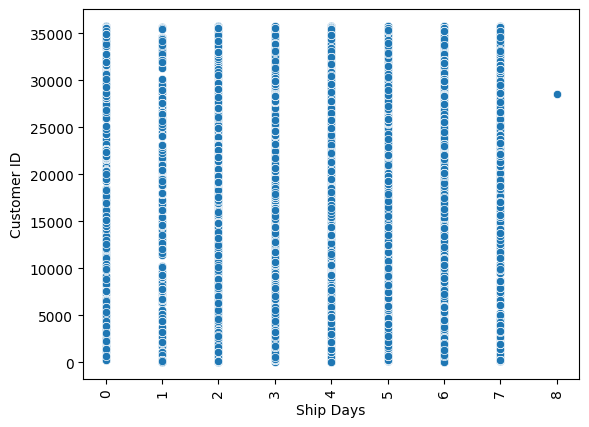

In [ ]:
sns.scatterplot(data=data, x="Ship Days", y="Customer ID")
plt.xticks(rotation=90)
plt.show()

In [ ]:
ship_mode_profit = data.groupby(['Ship Mode'])['Profit'].min().reset_index()
ship_mode_profit

,Ship Mode,Profit
0,One Day,-10596.168
1,Priority,-35699.881
2,Special,-61427.732
3,Standard,-71399.762


In [ ]:
#неуникальных
count_customer_id_not_unique = data.groupby(['OP year'])['Customer ID'].count().reset_index()
count_customer_id_not_unique

,OP year,Customer ID
0,2018,1899
1,2019,1961
2,2020,2432
3,2021,3129


In [ ]:
#уникальных клиентов по годам
count_customer_id_unique = data.groupby(['OP year'])['Customer ID'].nunique()
count_customer_id_unique = count_customer_id_unique.to_frame()
count_customer_id_unique

,Customer ID
OP year,
2018,569
2019,544
2020,612
2021,676


In [ ]:
count_purchase_id_unique = data.groupby(['OP year'])['Purchase ID'].nunique()
count_purchase_id_unique = count_purchase_id_unique.to_frame()
count_purchase_id_unique

,Purchase ID
OP year,
2018,578
2019,611
2020,717
2021,801


In [ ]:
count_profit_years = data.groupby(['OP year'])['Profit'].sum().reset_index()
count_profit_years

,OP year,Profit
0,2018,2.574965e+06
1,2019,2.546856e+06
2,2020,3.464598e+06
3,2021,4.540764e+06


In [ ]:
count_sales_years = data.groupby(['OP year'])['Sales'].sum().reset_index()
count_sales_years

,OP year,Sales
0,2018,2.012662e+07
1,2019,1.819351e+07
2,2020,2.487184e+07
3,2021,2.908123e+07


In [ ]:
data['coef profit sales'] = data['Profit']/data['Sales']

In [ ]:
count_profit_years['Customer ID count'] = count_customer_id_unique['Customer ID']
count_profit_years

,OP year,Profit,Customer ID count
0,2018,2.574965e+06,NaN
1,2019,2.546856e+06,NaN
2,2020,3.464598e+06,NaN
3,2021,4.540764e+06,NaN


In [ ]:
x = count_profit_years['Profit'] / count_customer_id_unique['Customer ID']
x

0      NaN
1      NaN
2      NaN
3      NaN
2018   NaN
2019   NaN
2020   NaN
2021   NaN
dtype: float64

In [ ]:
cust_id_count = count_customer_id_unique['Customer ID'].sum()
cust_id_count

2401

In [ ]:
profit_count = data['Profit'].sum()
profit_count

13127181.949499995

In [ ]:
sales_count = data['Sales'].sum()
sales_count

92273201.035

In [ ]:
coef_profit_sales = profit_count/sales_count
coef_profit_sales

0.14226429561624013

In [ ]:
profit_per_each_customer = profit_count / cust_id_count
profit_per_each_customer

5467.38107017909

In [ ]:
count_fed_subj = data.groupby(['OP year'])['Federal subject'].nunique()
count_fed_subj = count_fed_subj.to_frame()
count_fed_subj

,Federal subject
OP year,
2018,78
2019,76
2020,77
2021,82


In [ ]:
count_coef_profit_sales = data.groupby(['OP year'])['coef profit sales'].mean()*100
count_coef_profit_sales.to_frame()

,coef profit sales
OP year,
2018,15.955210
2019,16.727496
2020,17.198282
2021,16.341529


In [ ]:
count_purchase_id_unique['sales'] = data['Sales'].sum()
count_purchase_id_unique

,Purchase ID,sales
OP year,,
2018,578,9.227320e+07
2019,611,9.227320e+07
2020,717,9.227320e+07
2021,801,9.227320e+07


In [ ]:
count_purchase_id_unique['sales per purch id'] = count_sales_years['Sales'] / count_purchase_id_unique['Purchase ID']
count_purchase_id_unique

,Purchase ID,sales,sales per purch id
OP year,,,
2018,578,9.227320e+07,NaN
2019,611,9.227320e+07,NaN
2020,717,9.227320e+07,NaN
2021,801,9.227320e+07,NaN


In [ ]:
data_11745 = data[data['Customer ID'] == 11745]
data_11745.head()

,Row ID,Purchase ID,Operation Date,Ship Date,Ship Mode,Customer ID,Customer Segment,City,City (Russian),Federal subject,...,Category,Sub-Category,Product ID,Sales,Quantity,Profit,Ship Days,OP year,coef profit sales,count purchase id
500,537,2014-3680,2021-09-04,2021-09-09,Special,11745,Individual,Chelyabinsk,Челябинск,Chelyabinsk Oblast,...,Other devices,Joysticks & gamepads,OTH-JOY-20003262,4657.320,3,620.9760,5,2021,0.133333,NaN
1460,1550,2011-2020,2018-07-06,2018-07-08,Priority,11745,Individual,Moscow,Москва,Moscow (federal city),...,Computers,PCs,COM-PCS-20007190,53549.235,1,20824.7025,2,2018,0.388889,NaN
2562,2726,2014-2470,2021-11-08,2021-11-14,Standard,11745,Individual,Kazan,Казань,Republic of Tatarstan,...,Computers,Mobile phones,COM-PHO-20005166,12238.980,2,-2447.7960,6,2021,-0.200000,NaN
2563,2727,2014-2470,2021-11-08,2021-11-14,Standard,11745,Individual,Kazan,Казань,Republic of Tatarstan,...,Monitors,"28,1""+",MON-281-20005994,7444.980,2,-13400.9640,6,2021,-1.800000,NaN
2705,2886,2013-4360,2020-10-19,2020-10-23,Standard,11745,Individual,Mineralnye Vody,Минеральные Воды,Stavropol Krai,...,Monitors,"23,1""-25""",MON-2325-20004164,13086.600,2,1439.5260,4,2020,0.110000,NaN


In [ ]:
purchases_per_11745 = data_11745.groupby(['OP year'])['Purchase ID'].nunique()
purchases_per_11745

OP year
2018    1
2019    2
2020    5
2021    9
Freq: A-DEC, Name: Purchase ID, dtype: int64

In [15]:
data_regions = pd.read_excel('/content/итоговый проект 1 датасет.xlsx', sheet_name='Regions')
data_regions

,Code,Name,Capital/Administrative centre[a],Type,Federal district,Economic region,Area km2,Year established,Population,Population density (/km2)
0,1,Republic of Adygea,Maykop,republic,Southern,North Caucasus,7600,1922,447109,58.8
1,2,Republic of Bashkortostan,Ufa,republic,Volga,Ural,143600,1919,4104336,28.6
2,3,Republic of Buryatia,Ulan-Ude,republic,Far Eastern,East Siberian,351300,1923,981238,2.8
3,4,Altai Republic,Gorno-Altaysk,republic,Siberian,West Siberian,92600,1922,202947,2.2
4,5,Republic of Dagestan,Makhachkala,republic,North Caucasian,North Caucasus,50300,1921,2576531,51.2
...,...,...,...,...,...,...,...,...,...,...
80,81,Khanty-Mansi Autonomous Okrug-Yugra,Khanty-Mansiysk,autonomous okrug,Ural,West Siberian,523100,1930,1432817,2.7
81,82,Chukotka Autonomous Okrug,Anadyr,autonomous okrug,Far Eastern,Far Eastern,737700,1930,53824,0.1
82,83,Yamalo-Nenets Autonomous Okrug,Salekhard,autonomous okrug,Ural,West Siberian,750300,1930,507006,0.7
83,84,Republic of Crimea,Simferopol,republic,Southern,North Caucasus,26964,2014,1966801,72.9


In [12]:
profit_per_fed_sub = data.groupby(['Federal subject'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
profit_per_fed_sub

,Federal subject,Profit
32,Moscow (federal city),2.060651e+06
59,Saint Petersburg (federal city),1.458654e+06
67,Sverdlovsk Oblast,1.153999e+06
37,Novosibirsk Oblast,1.037747e+06
46,Republic of Bashkortostan,6.322961e+05
...,...,...
8,Chelyabinsk Oblast,-3.556744e+04
60,Sakha (Yakutia) Republic,-4.211718e+04
31,Mari El Republic,-5.212269e+04
58,Ryazan Oblast,-1.049304e+05


In [17]:
profit_per_fed_sub['Population'] = data_regions['Population']
profit_per_fed_sub

,Federal subject,Profit,Populatio,Population
32,Moscow (federal city),2.060651e+06,1523990,1523990
59,Saint Petersburg (federal city),1.458654e+06,760810,760810
67,Sverdlovsk Oblast,1.153999e+06,1178443,1178443
37,Novosibirsk Oblast,1.037747e+06,2581705,2581705
46,Republic of Bashkortostan,6.322961e+05,1669205,1669205
...,...,...,...,...
8,Chelyabinsk Oblast,-3.556744e+04,439470,439470
60,Sakha (Yakutia) Republic,-4.211718e+04,4404013,4404013
31,Mari El Republic,-5.212269e+04,1378941,1378941
58,Ryazan Oblast,-1.049304e+05,2819421,2819421
